# 📃 Solution for Exercise M4.02

In the previous notebook, we showed that we can add new features based on the
original feature `x` to make the model more expressive, for instance `x ** 2` or
`x ** 3`. In that case we only used a single feature in `data`.

The aim of this notebook is to train a linear regression algorithm on a
dataset with more than a single feature. In such a "multi-dimensional" feature
space we can derive new features of the form `x1 * x2`, `x2 * x3`, etc.
Products of features are usually called "non-linear" or "multiplicative"
interactions between features.

Feature engineering can be an important step of a model pipeline as long as
the new features are expected to be predictive. For instance, think of a
classification model to decide if a patient has risk of developing a heart
disease. This would depend on the patient's Body Mass Index which is defined
as `weight / height ** 2`.

We load the penguins dataset. We first use a set of 3 numerical
features to predict the target, i.e. the body mass of the penguin.

In [2]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins.csv")

columns = ["Flipper Length (mm)", "Culmen Length (mm)", "Culmen Depth (mm)"]
target_name = "Body Mass (g)"

# Remove lines with missing values for the columns of interest
penguins_non_missing = penguins[columns + [target_name]].dropna()

data = penguins_non_missing[columns]
target = penguins_non_missing[target_name]
data

,Flipper Length (mm),Culmen Length (mm),Culmen Depth (mm)
0,181.0,39.1,18.7
1,186.0,39.5,17.4
2,195.0,40.3,18.0
4,193.0,36.7,19.3
5,190.0,39.3,20.6
...,...,...,...
339,207.0,55.8,19.8
340,202.0,43.5,18.1
341,193.0,49.6,18.2
342,210.0,50.8,19.0


Now it is your turn to train a linear regression model on this dataset. First,
create a linear regression model.

In [3]:
# solution
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

Execute a cross-validation with 10 folds and use the mean absolute error (MAE)
as metric.

In [4]:
# solution
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    linear_regression,
    data,
    target,
    cv=10,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)

Compute the mean and std of the MAE in grams (g). Remember you have to revert
the sign introduced when metrics start with `neg_`, such as in
`"neg_mean_absolute_error"`.

In [5]:
# solution
print(
    "Mean absolute error on testing set with original features: "
    f"{-cv_results['test_score'].mean():.3f} ± "
    f"{cv_results['test_score'].std():.3f} g"
)

Mean absolute error on testing set with original features: 337.071 ± 84.868 g


Now create a pipeline using `make_pipeline` consisting of a
`PolynomialFeatures` and a linear regression. Set `degree=2` and
`interaction_only=True` to the feature engineering step. Remember not to
include a "bias" feature (that is a constant-valued feature) to avoid
introducing a redundancy with the intercept of the subsequent linear
regression model.

You may want to use the `.set_output(transform="pandas")` method of the
pipeline to answer the next question.

In [6]:
# solution
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_features = PolynomialFeatures(
    degree=2, include_bias=False, interaction_only=True
)
linear_regression_interactions = make_pipeline(
    poly_features, linear_regression
).set_output(transform="pandas")

Transform the first 5 rows of the dataset and look at the column names. How
many features are generated at the output of the `PolynomialFeatures` step in
the previous pipeline?

In [7]:
# solution
linear_regression_interactions.fit(data, target)
linear_regression_interactions[0].transform(data[:5])

,Flipper Length (mm),Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm) Culmen Length (mm),Flipper Length (mm) Culmen Depth (mm),Culmen Length (mm) Culmen Depth (mm)
0,181.0,39.1,18.7,7077.1,3384.7,731.17
1,186.0,39.5,17.4,7347.0,3236.4,687.30
2,195.0,40.3,18.0,7858.5,3510.0,725.40
4,193.0,36.7,19.3,7083.1,3724.9,708.31
5,190.0,39.3,20.6,7467.0,3914.0,809.58


We observe that 3 features are generated, corresponding to the different
combinations of products of the 3 original features, i.e. we have 6
intermediate features in total. In general, given `p` original features, one
has `p * (p - 1) / 2` interactions.

Check that the values for the new interaction features are correct for a few
of them.

Let's now check that the value in the 1st row and the 5th column (3384.7) is
the product of the values at the first and third columns (respectively 181.0
and 18.7) of the same row:

In [8]:
# solution
flipper_length_first_sample = 181.0
culmen_depth_first_sample = 18.7
flipper_length_first_sample * culmen_depth_first_sample

3384.7

Use the same cross-validation strategy as done previously to estimate the mean
and std of the MAE in grams (g) for such a pipeline. Compare with the results
without feature engineering.

In [9]:
# solution
cv_results = cross_validate(
    linear_regression_interactions,
    data,
    target,
    cv=10,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)
print(
    "Mean absolute error on testing set with interactions: "
    f"{-cv_results['test_score'].mean():.3f} ± "
    f"{cv_results['test_score'].std():.3f} g"
)

Mean absolute error on testing set with interactions: 301.790 ± 44.340 g


We observe that the MAE is lower and less spread with the enriched features.
In this case the additional "interaction" features are indeed predictive.
Later in this module we will see what happens when the enriched features are
non-predictive and how to deal with this case.


Now let's try to build an alternative pipeline with an adjustable number of
intermediate features while keeping a similar predictive power. To do so, try
using the `Nystroem` transformer instead of `PolynomialFeatures`. Set the
kernel parameter to `"poly"` and `degree` to 2. Adjust the number of
components to be as small as possible while keeping a good cross-validation
performance.

Hint: Use a `ValidationCurveDisplay` with `param_range = np.array([5, 10, 50,
100])` to find the optimal `n_components`.

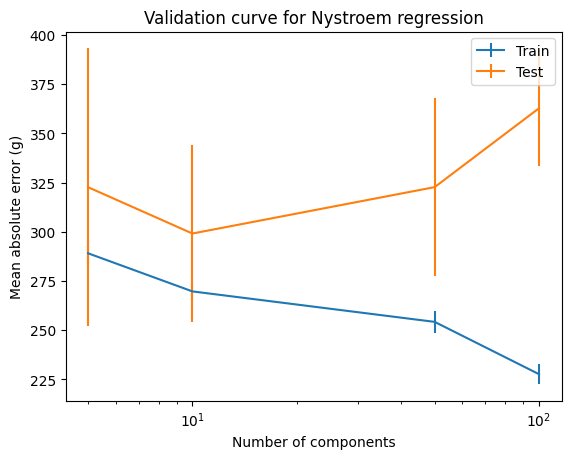

In [10]:
# solution
import numpy as np

from sklearn.kernel_approximation import Nystroem
from sklearn.model_selection import ValidationCurveDisplay

nystroem_regression = make_pipeline(
    Nystroem(kernel="poly", degree=2, random_state=0),
    linear_regression,
)

param_range = np.array([5, 10, 50, 100])
disp = ValidationCurveDisplay.from_estimator(
    nystroem_regression,
    data,
    target,
    param_name="nystroem__n_components",
    param_range=param_range,
    cv=10,
    scoring="neg_mean_absolute_error",
    negate_score=True,
    std_display_style="errorbar",
    n_jobs=2,
)

_ = disp.ax_.set(
    xlabel="Number of components",
    ylabel="Mean absolute error (g)",
    title="Validation curve for Nystroem regression",
)

In the validation curve above we can observe that a small number of components
leads to an underfitting model, whereas a large number of components leads to
an overfitting model. The optimal number of Nyström components is around 10
for this dataset.

How do the mean and std of the MAE for the Nystroem pipeline with optimal
`n_components` compare to the other previous models?

In [11]:
# solution
nystroem_regression.set_params(nystroem__n_components=10)
cv_results = cross_validate(
    nystroem_regression,
    data,
    target,
    cv=10,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)
print(
    "Mean absolute error on testing set with nystroem: "
    f"{-cv_results['test_score'].mean():.3f} ± "
    f"{cv_results['test_score'].std():.3f} g"
)

Mean absolute error on testing set with nystroem: 299.092 ± 44.819 g


In this case we have a model with 10 features instead of 6, and which has
approximately the same prediction error as the model with interactions.

Notice that if we had `p = 100` original features (instead of 3), the
`PolynomialFeatures` transformer would have generated `100 * (100 - 1) / 2 =
4950` additional interaction features (so we would have 5050 features in
total). The resulting pipeline would have been much slower to train and
predict and would have had a much larger memory footprint. Furthermore, the
large number of interaction features would probably have resulted in an
overfitting model.

On the other hand, the `Nystroem` transformer generates a user-adjustable
number of features (`n_components`). Furthermore, the optimal number of
components is usually much smaller than that. So the `Nystroem` transformer
can be more scalable when the number of original features is too large for
`PolynomialFeatures` to be used.

The main downside of the `Nystroem` transformer is that it is not possible to
easily interpret the meaning of the generated features and therefore the
meaning of the learned coefficients for the downstream linear model.